In [165]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import plotly.express as px
import plotly.graph_objects as go

In [166]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [167]:
root = "/content/drive/Shareddrives/TC2034_IA_Evidencia/Conjuntos de Datos/Lung Cancer/survey lung cancer.csv"
df_LG = pd.read_csv(root) # Lectura del conjunto de datos. 

In [168]:
df_LG.head(5) # Primeras 5 filas del conjunto de datos.

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [169]:
df_LG.tail(5) # Últimas 5 filas del conjunto de datos.

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES
308,M,62,1,1,1,2,1,2,2,2,2,1,1,2,1,YES


In [170]:
df_LG.shape # Dimensiones del conjunto de datos.

(309, 16)

In [171]:
df_LG.dtypes # Tipo de datos de las variables del conjunto de datos.

GENDER                   object
AGE                       int64
SMOKING                   int64
YELLOW_FINGERS            int64
ANXIETY                   int64
PEER_PRESSURE             int64
CHRONIC DISEASE           int64
FATIGUE                   int64
ALLERGY                   int64
WHEEZING                  int64
ALCOHOL CONSUMING         int64
COUGHING                  int64
SHORTNESS OF BREATH       int64
SWALLOWING DIFFICULTY     int64
CHEST PAIN                int64
LUNG_CANCER              object
dtype: object

# Datos Nulos

In [172]:
df_LG_na = df_LG.isna().sum()
df_LG_na

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [173]:
df_LG_na / df_LG.shape[0] * 100 # Porcentaje de datos nulos respecto al total.

GENDER                   0.0
AGE                      0.0
SMOKING                  0.0
YELLOW_FINGERS           0.0
ANXIETY                  0.0
PEER_PRESSURE            0.0
CHRONIC DISEASE          0.0
FATIGUE                  0.0
ALLERGY                  0.0
WHEEZING                 0.0
ALCOHOL CONSUMING        0.0
COUGHING                 0.0
SHORTNESS OF BREATH      0.0
SWALLOWING DIFFICULTY    0.0
CHEST PAIN               0.0
LUNG_CANCER              0.0
dtype: float64

In [174]:
df_LG_na[df_LG_na != 0] # Desplegar variables que tienen al menos un dato nulo.

Series([], dtype: int64)

# Distribuciones

In [175]:
for i in df_LG.columns:
  vble_ = i
  fig = px.histogram(df_LG, x=vble_,color=vble_)
  fig.show()

# Tratamiento de Datos

In [176]:
# Columnas categórcas
categ_cols = sorted([cname for cname in df_LG.columns if df_LG[cname].dtype == "object"])
categ_cols

['GENDER', 'LUNG_CANCER']

In [177]:
df_LG[categ_cols]

,GENDER,LUNG_CANCER
0,M,YES
1,M,YES
2,F,NO
3,M,NO
4,F,NO
...,...,...
304,F,YES
305,M,YES
306,M,YES
307,M,YES


In [178]:
df_LG_2 = df_LG

In [179]:
df_LG_2.head(5)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


Cambiamos la variable de género masculino a 0, y género femenino a 1
Del mismo modo, no tener cáncer de pulmón lo anotamos como 0, y sí tener como 1

In [180]:
df_LG_2.loc[df_LG_2["GENDER"] == "M","GENDER"] = 0
df_LG_2.loc[df_LG_2["GENDER"] == "F","GENDER"] = 1

df_LG_2.loc[df_LG_2["LUNG_CANCER"] == "NO","LUNG_CANCER"] = 0
df_LG_2.loc[df_LG_2["LUNG_CANCER"] == "YES","LUNG_CANCER"] = 1
df_LG_2.head(5)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,0,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,0,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,1,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,0,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,1,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


In [181]:
# Convertir el tipo de dato a numérico.
for i in df_LG_2:
  df_LG_2[i] = pd.to_numeric(df_LG_2[i])

In [182]:
df_LG_2.dtypes

GENDER                   int64
AGE                      int64
SMOKING                  int64
YELLOW_FINGERS           int64
ANXIETY                  int64
PEER_PRESSURE            int64
CHRONIC DISEASE          int64
FATIGUE                  int64
ALLERGY                  int64
WHEEZING                 int64
ALCOHOL CONSUMING        int64
COUGHING                 int64
SHORTNESS OF BREATH      int64
SWALLOWING DIFFICULTY    int64
CHEST PAIN               int64
LUNG_CANCER              int64
dtype: object

In [183]:
df_LG_2["AGE"].nunique() # Cantidad de valores únicos de edadeds.

39

In [184]:
df_LG_2["AGE"].describe() # Valores estadísticos referente a la columna AGE.

count    309.000000
mean      62.673139
std        8.210301
min       21.000000
25%       57.000000
50%       62.000000
75%       69.000000
max       87.000000
Name: AGE, dtype: float64

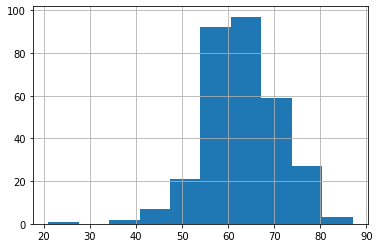

In [185]:
df_LG_2["AGE"].hist() # Distribución de la variable AGE

In [186]:
# Agrupación de edades.
df_LG_2.loc[df_LG_2["AGE"] < 65,"AGE"] = 0 # Adultos que no son de la tercera edad.
#df_LG_2.loc[(df_LG_2["AGE"] >= 55) & (df_LG_2["AGE"] < 65),"AGE"] = 1
df_LG_2.loc[(df_LG_2["AGE"] >= 65),"AGE"] = 2 # Adultos de la tercera edad.

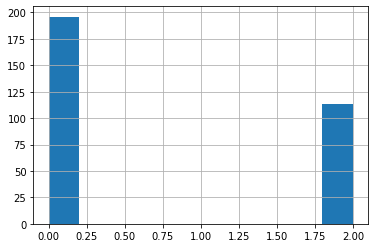

In [187]:
df_LG_2["AGE"].hist()

In [188]:
df_LG_2.head(5)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,0,2,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,0,2,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,1,0,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,0,0,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,1,0,1,2,1,1,1,1,1,2,1,2,2,1,1,0


# Correlación entre variables

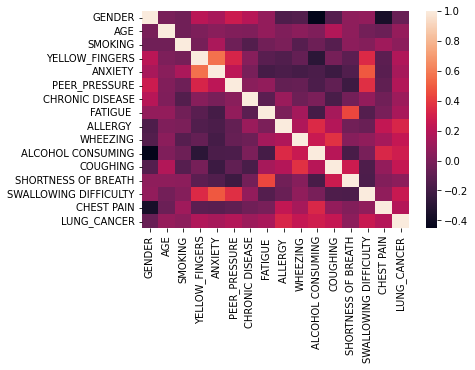

In [189]:
df_corr = df_LG_2.corr()
import seaborn as sns
sns.heatmap(df_corr);
#df_corr

In [190]:
correlated_features = set()
correlation_matrix = df_LG_2.corr()

for i in range(len(correlation_matrix .columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.5:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

In [191]:
correlated_features

{'ANXIETY'}

# Modelos ML

In [192]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [193]:
#"GENDER","AGE","SMOKING	YELLOW_FINGERS	ANXIETY	PEER_PRESSURE	CHRONIC DISEASE	FATIGUE 	ALLERGY 	WHEEZING	ALCOHOL CONSUMING	COUGHING	SHORTNESS OF BREATH	SWALLOWING DIFFICULTY	CHEST PAIN
feature_cols = ['YELLOW_FINGERS', 'FATIGUE ', 'ANXIETY', 'WHEEZING', 'COUGHING', 'SHORTNESS OF BREATH', 'SWALLOWING DIFFICULTY', 'CHEST PAIN']

clase = "LUNG_CANCER"
X = df_LG_2[feature_cols] # Features
#X = df_LG_2.drop(clase,axis=1) # Features
#feature_cols = X.columns

y = df_LG_2[clase] # Target variable

In [194]:
print(X.shape)
print(y.shape)
X

(309, 8)
(309,)


,YELLOW_FINGERS,FATIGUE,ANXIETY,WHEEZING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
0,2,2,2,2,2,2,2,2
1,1,2,1,1,1,2,2,2
2,1,2,1,2,2,2,1,2
3,2,1,2,1,1,1,2,2
4,2,1,1,2,2,2,1,1
...,...,...,...,...,...,...,...,...
304,1,2,1,1,2,2,2,1
305,1,2,1,2,2,2,1,2
306,1,1,1,2,2,1,1,2
307,1,2,2,1,2,2,1,2


In [195]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) # 80% training and 20% test

## Árbol de decisión
Encargado: Cristian Gonzaga López

In [196]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)

[[ 5  4]
 [ 6 78]]


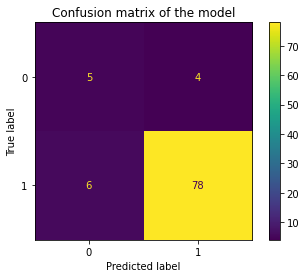

In [197]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
print(cm)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title('Confusion matrix of the model')
plt.show()

In [198]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision",metrics.precision_score(y_test, y_pred)) 
print("Recall",metrics.recall_score(y_test,y_pred))
print("F1",metrics.f1_score(y_test,y_pred))

# print the scores on training and test set
print('\nTraining set score: {:.4f}'.format(clf.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf.score(X_test, y_test)))

Accuracy: 0.8924731182795699
Precision 0.9512195121951219
Recall 0.9285714285714286
F1 0.9397590361445782

Training set score: 0.9583
Test set score: 0.8925


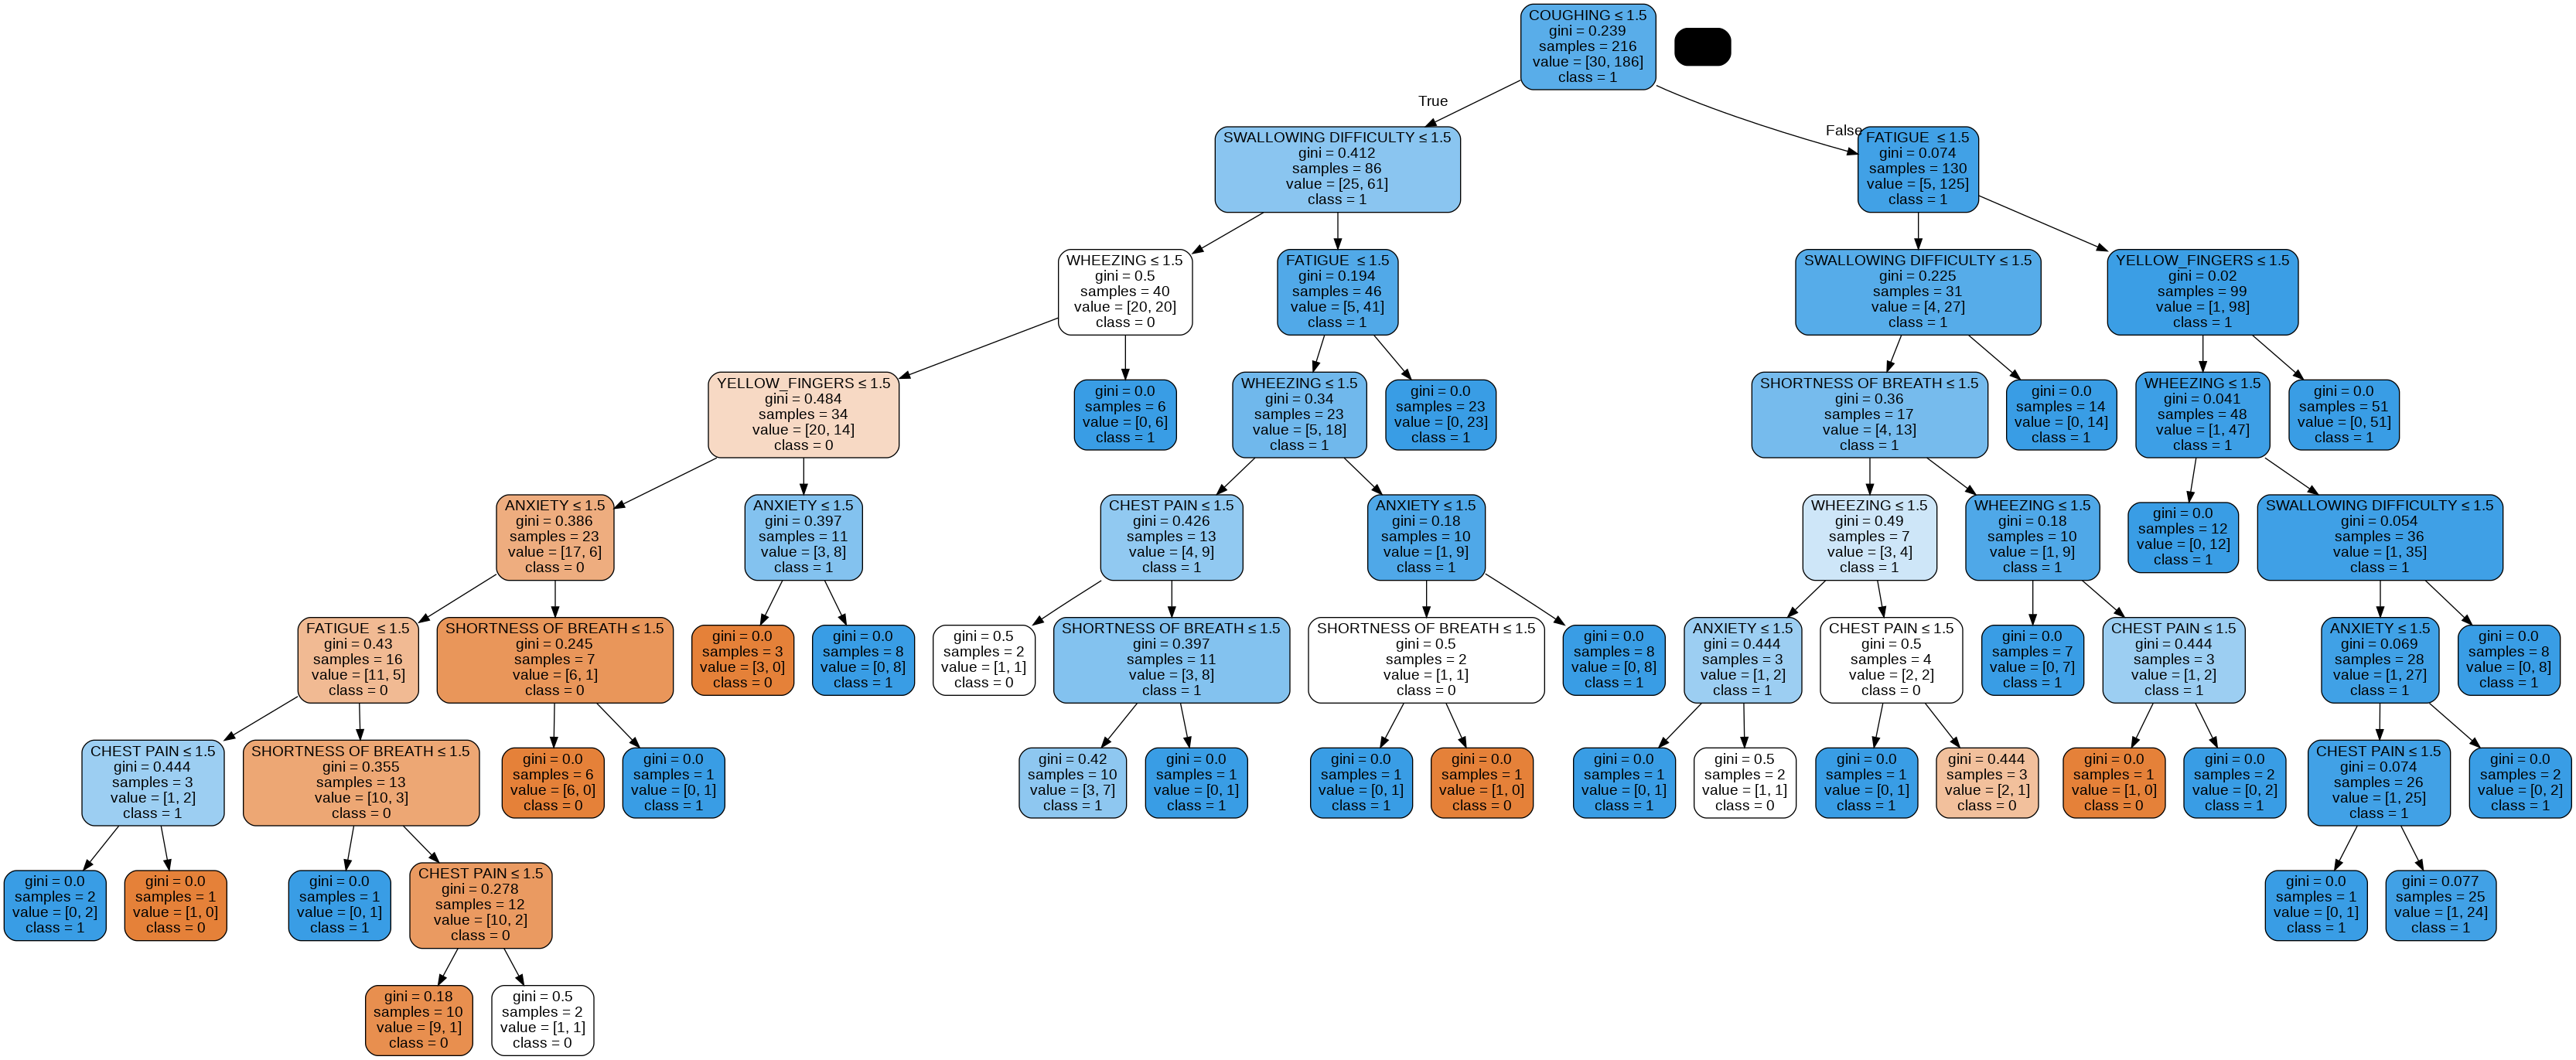

In [199]:
from six import StringIO
from sklearn.tree import export_graphviz
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Lung Cancer.png')
Image(graph.create_png())

## Support vector machine (SVM)
Diego Hermosillo Palomo

#### Kernel lineal:

In [200]:
#Importaremos svc porque es un problema de clasificación
from sklearn.svm import SVC
svclassifier=SVC(kernel="linear")
#Entrenamiento del modelo:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
svclassifier.fit(X_train,y_train)

SVC(kernel='linear')

In [201]:
#Predicciones del modelo:
#Usaremos la función predict
y_pred=svclassifier.predict(X_test)

In [202]:
from sklearn.metrics import confusion_matrix

print(metrics.confusion_matrix(y_pred,y_test))

[[ 4  6]
 [ 5 78]]


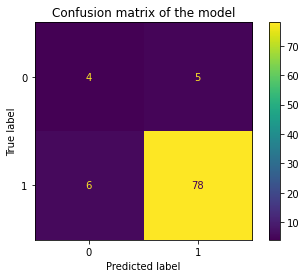

In [203]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title('Confusion matrix of the model')
plt.show()

In [204]:
print("Accuracy: ",metrics.accuracy_score(y_test,y_pred)," %Correct predictions/total predictions")
print("Precision: ",metrics.precision_score(y_test,y_pred)," % Predicted positives identified correctly")
print("Recall: ",metrics.recall_score(y_test,y_pred), " % Actual positives identified correctly")
print("F1 Score: ",metrics.f1_score(y_test,y_pred), "Balance between precision and recall")

Accuracy:  0.8817204301075269  %Correct predictions/total predictions
Precision:  0.9397590361445783  % Predicted positives identified correctly
Recall:  0.9285714285714286  % Actual positives identified correctly
F1 Score:  0.9341317365269461 Balance between precision and recall


Podemos ver que aunque el accuracy es alto, sin embargo tiene un recall muy malo

#### Kernel: Sigmoid

[[ 0  9]
 [ 0 84]]


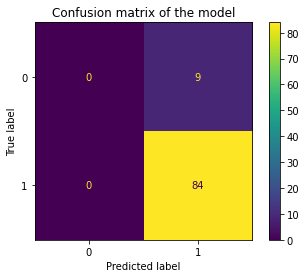

Accuracy:  0.9032258064516129  %Correct predictions/total predictions
Precision:  0.9032258064516129  % Predicted positives identified correctly
Recall:  1.0  % Actual positives identified correctly
F1 Score:  0.9491525423728813 Balance between precision and recall


In [205]:

svclassifier=SVC(kernel="sigmoid")
svclassifier.fit(X_train,y_train)

y_pred=svclassifier.predict(X_test)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title('Confusion matrix of the model')
plt.show()

print("Accuracy: ",metrics.accuracy_score(y_test,y_pred)," %Correct predictions/total predictions")
print("Precision: ",metrics.precision_score(y_test,y_pred)," % Predicted positives identified correctly")
print("Recall: ",metrics.recall_score(y_test,y_pred), " % Actual positives identified correctly")
print("F1 Score: ",metrics.f1_score(y_test,y_pred), "Balance between precision and recall")

#### Gaussian Kernel

[[ 2  7]
 [ 4 80]]


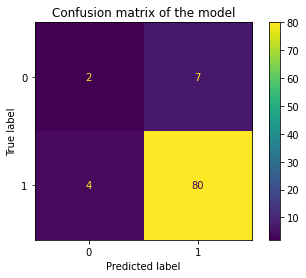

Accuracy:  0.8817204301075269  %Correct predictions/total predictions
Precision:  0.9195402298850575  % Predicted positives identified correctly
Recall:  0.9523809523809523  % Actual positives identified correctly
F1 Score:  0.935672514619883 Balance between precision and recall


In [206]:

svclassifier=SVC(kernel="rbf")
svclassifier.fit(X_train,y_train)

y_pred=svclassifier.predict(X_test)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title('Confusion matrix of the model')
plt.show()

print("Accuracy: ",metrics.accuracy_score(y_test,y_pred)," %Correct predictions/total predictions")
print("Precision: ",metrics.precision_score(y_test,y_pred)," % Predicted positives identified correctly")
print("Recall: ",metrics.recall_score(y_test,y_pred), " % Actual positives identified correctly")
print("F1 Score: ",metrics.f1_score(y_test,y_pred), "Balance between precision and recall")

#### Polynomial kernel

[[ 3  6]
 [ 6 78]]


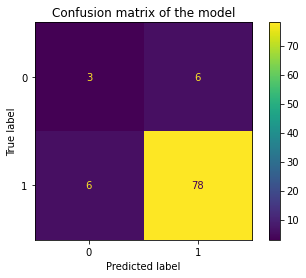

Accuracy:  0.8709677419354839  %Correct predictions/total predictions
Precision:  0.9285714285714286  % Predicted positives identified correctly
Recall:  0.9285714285714286  % Actual positives identified correctly
F1 Score:  0.9285714285714286 Balance between precision and recall


In [207]:

svclassifier=SVC(kernel="poly",degree=3)
svclassifier.fit(X_train,y_train)

y_pred=svclassifier.predict(X_test)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title('Confusion matrix of the model')
plt.show()

print("Accuracy: ",metrics.accuracy_score(y_test,y_pred)," %Correct predictions/total predictions")
print("Precision: ",metrics.precision_score(y_test,y_pred)," % Predicted positives identified correctly")
print("Recall: ",metrics.recall_score(y_test,y_pred), " % Actual positives identified correctly")
print("F1 Score: ",metrics.f1_score(y_test,y_pred), "Balance between precision and recall")

## K Nearest neighbors (KNN)
Diego Hermosillo Palomo

In [208]:
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=1)


In [209]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=1)
classifier.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [210]:
y_pred=classifier.predict(X_test)


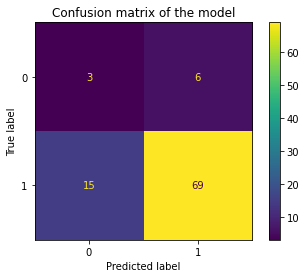

In [211]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
plt.title('Confusion matrix of the model')
plt.show()

In [212]:
confusion_matrix(y_test,y_pred)
print("Accuracy: ",metrics.accuracy_score(y_test,y_pred)," %Correct predictions/total predictions")
print("Precision: ",metrics.precision_score(y_test,y_pred)," % Predicted positives identified correctly")
print("Recall: ",metrics.recall_score(y_test,y_pred), " % Actual positives identified correctly")
print("F1 Score: ",metrics.f1_score(y_test,y_pred), "Balance between precision and recall")

Accuracy:  0.7741935483870968  %Correct predictions/total predictions
Precision:  0.92  % Predicted positives identified correctly
Recall:  0.8214285714285714  % Actual positives identified correctly
F1 Score:  0.8679245283018867 Balance between precision and recall


Ahora vamos a graficar el error que tienen distintos valores de "k", para ver cuáles son los óptimos para este ejemplo
Esta parte del código se puede encontrar en https://stackabuse.com/k-nearest-neighbors-algorithm-in-python-and-scikit-learn/

In [213]:
error = []
for i in range(1,30):
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  pred_i=knn.predict(X_test)
  error.append(np.mean(pred_i !=y_test))

Text(0, 0.5, 'Mean Error')

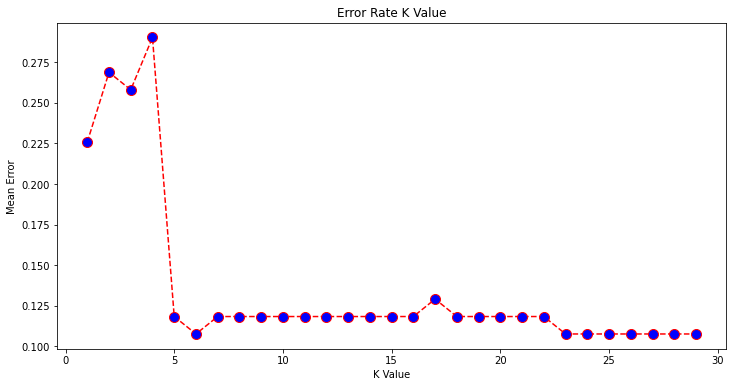

In [214]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 30), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

En el caso de dividir el conjunto de entrenamiento y testing en 80:20, se obtiene que el mejor valor para K es 1.

## Logistic Regression
Encargado: Cristian Gonzaga López

La regresión logística es un método estadístico para predecir clases binarias; la variable dependiente es categórica, lo que significa que tienen salidas binarias, como "verdadero" y "falso" o "sí" y "no".

Algoritmo consultado de: https://www.datacamp.com/tutorial/understanding-logistic-regression-python

Accuracy: 0.8817204301075269
Precision: 0.9294117647058824
Recall: 0.9404761904761905
F1 0.9349112426035503

Training set score: 0.9028
Test set score: 0.8817
[[ 3  6]
 [ 5 79]]


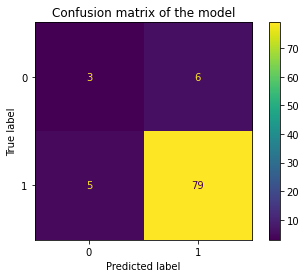

In [215]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1",metrics.f1_score(y_test,y_pred))

# print the scores on training and test set
print('\nTraining set score: {:.4f}'.format(logreg.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(logreg.score(X_test, y_test)))

print(confusion_matrix(y_test,y_pred))


ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title('Confusion matrix of the model')
plt.show()


## Random Forest Classifier
Michael Steven Delgado Caicedo

In [216]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
#X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.30,random_state=1)

In [217]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth=10,max_leaf_nodes=20,random_state=0)
#model = RandomForestClassifier(max_depth=10,max_leaf_nodes=30,random_state=0)
# Fit the model
model.fit(X_train,y_train)
predictions = model.predict(X_test)
print('MAE:',mean_absolute_error(y_test, predictions))
print('train score',model.score(X_train,y_train))
print('test score',model.score(X_test,y_test))
#print(list(X.columns))

MAE: 0.10752688172043011
train score 0.9490740740740741
test score 0.8924731182795699


Accuracy: 0.8817204301075269
Precision: 0.9294117647058824
Recall: 0.9404761904761905
F1 0.9349112426035503


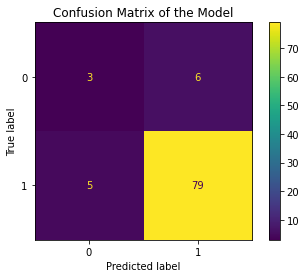

Classification Report:
              precision    recall  f1-score   support

           0       0.38      0.33      0.35         9
           1       0.93      0.94      0.93        84

    accuracy                           0.88        93
   macro avg       0.65      0.64      0.64        93
weighted avg       0.88      0.88      0.88        93

Accuracy: 0.8817204301075269


In [218]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1",metrics.f1_score(y_test,y_pred))
result = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title("Confusion Matrix of the Model")
plt.show()
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

## Redes Neuronales
Michael Steven Delgado Caicedo

In [219]:
print(X.shape)
print(y.shape)
print(type(X))
print(type(y))

# Spliting data into train and test
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

(309, 8)
(309,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [220]:
import numpy as np
import matplotlib.pyplot as plt
import keras
import warnings
from mpl_toolkits import mplot3d
from matplotlib import cm
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam #Actualización 
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
warnings.filterwarnings("ignore")

In [221]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean',verbose=0)
imputer = imputer.fit(X.iloc[:, 1:3])
X.iloc[:, 1:3] = imputer.transform(X.iloc[:, 1:3])
X=X.iloc[:, 1:3].values

In [222]:
#Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [223]:
y_train_2 = y_train.to_frame().T
y_test_2 = y_test.to_frame().T
print(y_train_2.shape)
print(y_test_2.shape)

(1, 216)
(1, 93)


In [224]:
print('x_train:\t{}' .format(X_train.shape))
print('y_train:\t{}' .format(y_train.shape))
print('x_test:\t\t{}'.format(X_test.shape))
print('y_test:\t\t{}'.format(y_test.shape))

x_train:	(216, 2)
y_train:	(216,)
x_test:		(93, 2)
y_test:		(93,)


In [225]:
X_train.shape[0]

216

In [226]:
y_train_2

,188,201,34,194,146,282,122,212,288,271,...,237,71,129,144,133,203,255,72,235,37
LUNG_CANCER,1,1,0,1,1,0,1,1,1,1,...,1,1,0,1,1,1,1,1,1,0


In [227]:
# Hyper-parameters
training_epochs = 400 # Total number of training epochs
learning_rate = 0.03 # The learning rate

In [228]:
# create model
def create_model():
    model = Sequential()
    # Input layer
    model.add(Dense(6, input_dim=2, kernel_initializer='normal', activation='relu'))
    # Output layer
    model.add(Dense(y_train_2.T.shape[1], activation='sigmoid'))

    # Compile model
    model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate), metrics=['accuracy'])
    return model
model = create_model()
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 6)                 18        
                                                                 
 dense_5 (Dense)             (None, 1)                 7         
                                                                 
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


In [229]:
results = model.fit(
    X_train, y_train_2.T,
    epochs= training_epochs,
    batch_size = 516,
    validation_data = (X_test, y_test_2.T),
    verbose = 0
)

In [230]:
prediction_values = model.predict(X_test)

In [231]:
print("Test-Accuracy:","%.8f%%" % (np.mean(results.history["val_accuracy"])*100))

Test-Accuracy: 90.32257795%


In [232]:
print("Evaluating on training set...")
(loss, accuracy) = model.evaluate(X_train, y_train.T)
print("loss={:.8f}, accuracy: {:.8f}%".format(loss,accuracy * 100))

print("Evaluating on testing set...")
(loss, accuracy) = model.evaluate(X_test, y_test.T)
print("loss={:.8f}, accuracy: {:.8f}%".format(loss,accuracy * 100))

Evaluating on training set...
7/7 [==============================] - 0s 2ms/step - loss: 0.3745 - accuracy: 0.8611
loss=0.37447074, accuracy: 86.11111045%
Evaluating on testing set...
3/3 [==============================] - 0s 4ms/step - loss: 0.3062 - accuracy: 0.9032
loss=0.30615422, accuracy: 90.32257795%


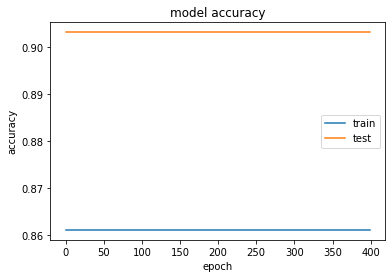

In [233]:
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='down right')

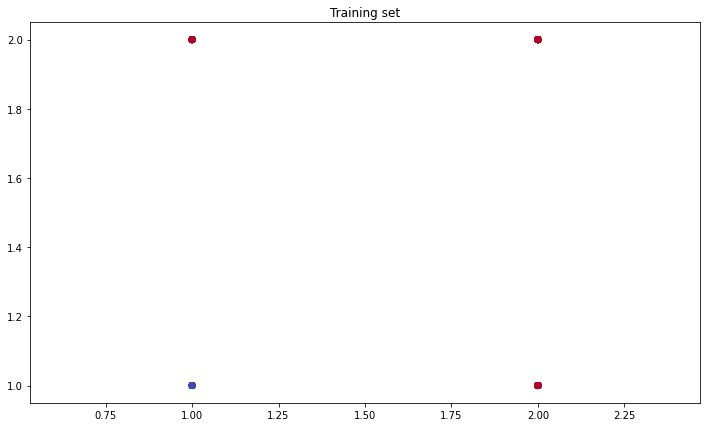

In [234]:
plt.figure(figsize=(12,7))
plt.scatter(X_train[:,0], X_train[:,1], c=y_train_2.iloc[0] ,cmap=cm.coolwarm)
plt.title('Training set')
plt.axis('equal');

Maximum Loss : 0.6757

Minimum Loss : 0.3745

Loss difference : 0.3012


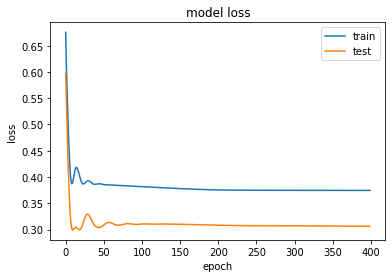

In [235]:
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

max_loss = np.max(results.history['loss'])
min_loss = np.min(results.history['loss'])
print("Maximum Loss : {:.4f}".format(max_loss))
print("")
print("Minimum Loss : {:.4f}".format(min_loss))
print("")
print("Loss difference : {:.4f}".format((max_loss - min_loss)))

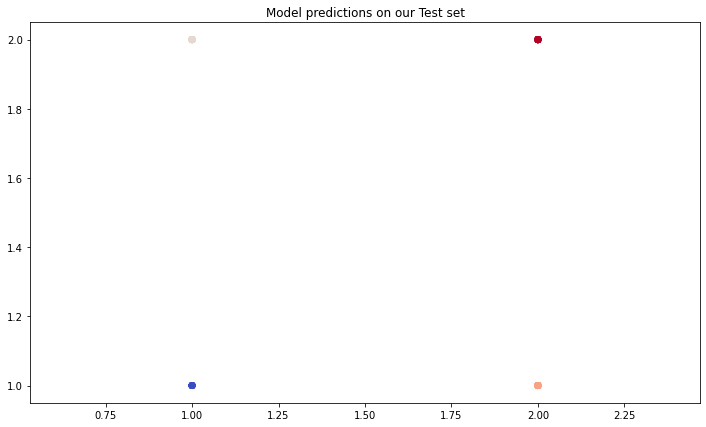

In [236]:
plt.figure(figsize =(12,7))
plt.scatter(X_test[:,0], X_test[:,1], c=prediction_values[:,0], cmap=cm.coolwarm)
plt.title('Model predictions on our Test set')
plt.axis('equal');

Text(0.5, 1.0, 'Model predictions on our Test set')

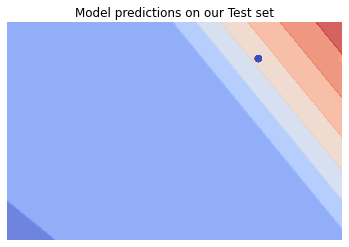

In [237]:
xx = np.linspace(-2, 2, 40)
yy = np.linspace(-1.5, 1.5, 40)
gx, gy = np.meshgrid(xx, yy)
Z = model.predict(np.c_[gx.ravel(), gy.ravel()])
Z = Z.reshape(gx.shape)
plt.contourf(gx, gy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

axes = plt.gca()
axes.set_xlim([-2, 2])
axes.set_ylim([-1.5, 1.5])
plt.grid('off')
plt.axis('off')

plt.scatter(X_test[:,0], X_test[:,1], c=prediction_values[:,0], cmap=cm.coolwarm)
plt.title('Model predictions on our Test set')

In [238]:
# Input layer
weights0 = model.layers[0].get_weights()[0]
biases0 = model.layers[0].get_weights()[1]
print("Input layer weights",weights0.shape,":\n",weights0)
print("Input layer biases",biases0.shape,":\n",biases0)

# Output layer
weights1 = model.layers[1].get_weights()[0]
biases1 = model.layers[1].get_weights()[1]
print("\nOutput layer weights",weights1.shape,":\n",weights1)
print("Output layer biases",biases1.shape,":\n",biases1)

Input layer weights (2, 6) :
 [[ 0.6228237   0.4475365  -0.18322957 -0.15250796  0.5979402  -0.01890232]
 [ 0.4380525   0.3019268  -0.14078648 -0.17761995  0.4280926  -0.00918987]]
Input layer biases (6,) :
 [-0.54356503 -1.0505897  -0.18016122 -0.18016219 -0.5708911   0.        ]

Output layer weights (6, 1) :
 [[ 0.9679491 ]
 [ 0.7130054 ]
 [-0.25758308]
 [-0.41676658]
 [ 0.90519583]
 [ 0.7044302 ]]
Output layer biases (1,) :
 [-0.23183493]


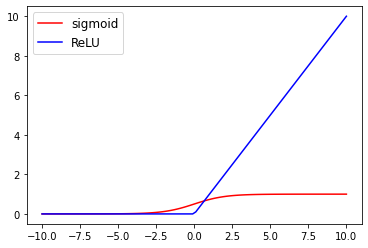

In [239]:
def sigmoid(z):
    return 1./(1+np.exp(-z))

def ReLU(z):
    return np.maximum(0,z)
  
z = np.linspace(-10,10,100)
plt.plot(z, sigmoid(z),'r', label = 'sigmoid')
plt.plot(z, ReLU(z),'b',label ='ReLU')
plt.legend(fontsize=12)

In [240]:
x1 = np.linspace(-2,2,50)
x2 = np.linspace(-2,2,50)
x3 = np.linspace(-1,1,50*50)

result = np.zeros((50*50,3)) 

out11 = np.zeros((50*50, 1))
out12 = np.zeros((50*50, 1))
out13 = np.zeros((50*50, 1))
out14 = np.zeros((50*50, 1))
out15 = np.zeros((50*50, 1))
out16 = np.zeros((50*50, 1))

out21 = np.zeros((50*50, 1))


for i in range(len(x1)):
    for j in range(len(x2 )):
        # Input layer
        n11 = x1[i] * weights0[0][0] + x2[j] * weights0[1][0] + biases0[0]
        a11 = ReLU(n11)

        n12 = x1[i] * weights0[0][1] + x2[j] * weights0[1][1] + biases0[1]
        a12 = ReLU(n12)

        n13 = x1[i] * weights0[0][2] + x2[j] * weights0[1][2] + biases0[2]
        a13 = ReLU(n13)

        n14 = x1[i] * weights0[0][3] + x2[j] * weights0[1][3] + biases0[3]
        a14 = ReLU(n14)

        n15 = x1[i] * weights0[0][4] + x2[j] * weights0[1][4] + biases0[4]
        a15 = ReLU(n15)

        n16 = x1[i] * weights0[0][5] + x2[j] * weights0[1][5] + biases0[5]
        a16 = ReLU(n16)

        # Output layer
        n21 = a11 *weights1[0][0] + a12 *weights1[1][0] + a13 * weights1[2][0] + \
        a14 *weights1[3][0] + a15 *weights1[4][0] +a16  *weights1[5][0] + biases1[0]
        a21 = sigmoid(n21)


        result[i*50+j,0 ] = x1[i]
        result[i*50+j, 1] = x2[j]

        out11[i*50+j] = a11
        out12[i*50+j] = a12
        out13[i*50+j] = a13
        out14[i*50+j] = a14
        out15[i*50+j] = a15
        out16[i*50+j] = a16
        out21[i*50+j] = a21

In [241]:
x1 = np.linspace(-2,2,50)
x2 = np.linspace(-2,2,50)
x3 = np.linspace(-1,1,50*50)

result = np.zeros((50*50,3)) 

out11 = np.zeros((50*50, 1))
out12 = np.zeros((50*50, 1))
out13 = np.zeros((50*50, 1))
out14 = np.zeros((50*50, 1))
out15 = np.zeros((50*50, 1))
out16 = np.zeros((50*50, 1))

out21 = np.zeros((50*50, 1))

for i in range(len(x1)):
    for j in range(len(x2 )):
        # Input layer
        n1 = np.dot(weights0[0],x1[i]) + np.dot(weights0[1],x1[j]) + biases0
        a1 = ReLU(n1)
        # Output layer
        n2 = np.dot(weights1[:,0],a1) + biases1
        a2 = sigmoid(n2)

        result[i*50+j,0 ] = x1[i]
        result[i*50+j, 1] = x2[j]

        out11[i*50+j] = a1[0]
        out12[i*50+j] = a1[1]
        out13[i*50+j] = a1[2]
        out14[i*50+j] = a1[3]
        out15[i*50+j] = a1[4]
        out16[i*50+j] = a1[5]

        out21[i*50+j] = a2

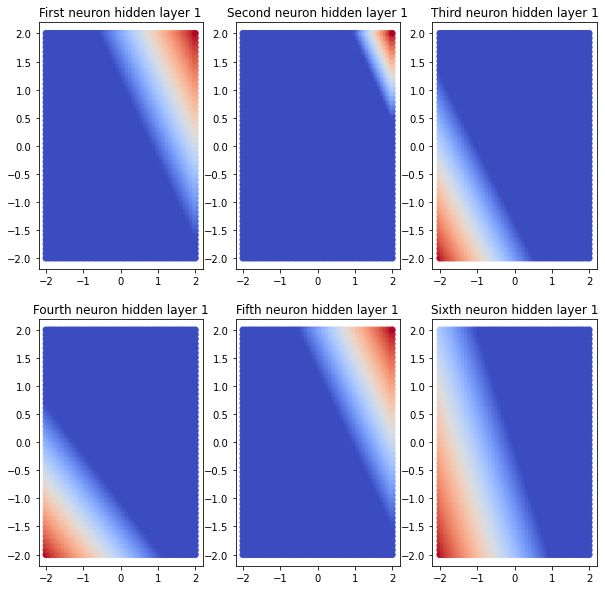

In [242]:
plt.figure(figsize =(10,10))

# First neuron, input layer
plt.subplot(231)
plt.title('First neuron hidden layer 1')
plt.scatter(result[:, 0], result[:, 1], c= out11.reshape(-1), cmap=cm.coolwarm)

# Second neuron, input layer
plt.subplot(232)
plt.title('Second neuron hidden layer 1')
plt.scatter(result[:, 0], result[:, 1], c= out12.reshape(-1), cmap=cm.coolwarm)

# Third neuron, input layer
plt.subplot(233)
plt.title('Third neuron hidden layer 1')
plt.scatter(result[:, 0], result[:, 1], c= out13.reshape(-1), cmap=cm.coolwarm)

# Fourth neuron, input layer
plt.subplot(234)
plt.title('Fourth neuron hidden layer 1')
plt.scatter(result[:, 0], result[:, 1], c= out14.reshape(-1), cmap=cm.coolwarm)

# Fifth neuron, input layer
plt.subplot(235)
plt.title('Fifth neuron hidden layer 1')
plt.scatter(result[:, 0], result[:, 1], c= out15.reshape(-1), cmap=cm.coolwarm)

# Sixth neuron, input layer
plt.subplot(236)
plt.title('Sixth neuron hidden layer 1')
plt.scatter(result[:, 0], result[:, 1], c= out16.reshape(-1), cmap=cm.coolwarm)

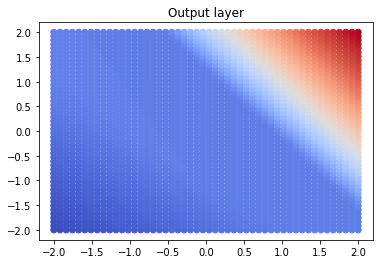

In [243]:
# output layer
plt.title('Output layer')
plt.scatter(result[:, 0], result[:, 1], c= out21.reshape(-1), cmap=cm.coolwarm)

Text(0.5, 0.92, '3D visualization of our neural network first layer sixth neuron')

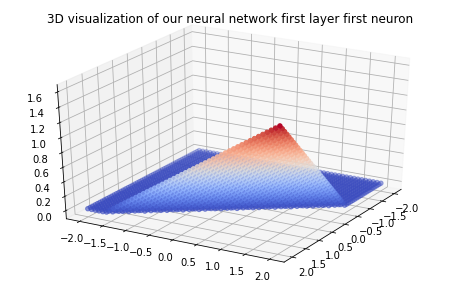

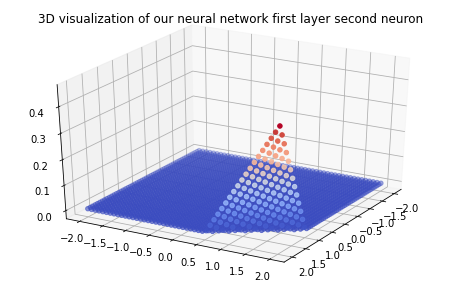

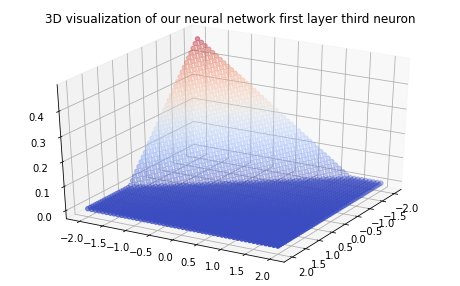

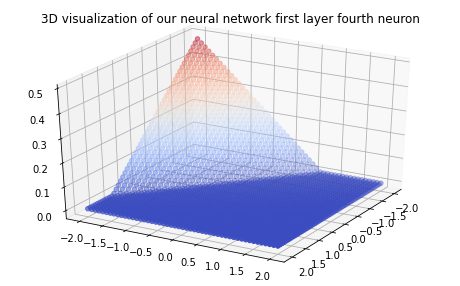

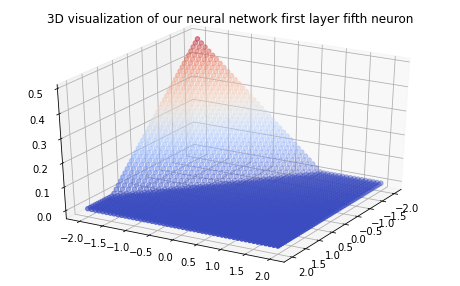

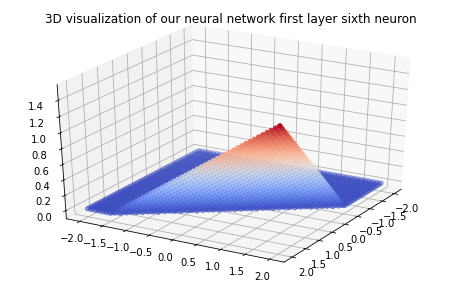

In [244]:
fig = plt.figure(figsize=(8, 5))
ax = plt.axes(projection='3d')
bar = ax.scatter3D(result[:, 0],result[:, 1],out11.reshape(-1), c=out11.reshape(-1), cmap=cm.coolwarm);
ax.view_init(30, 30)
ax.set_title('3D visualization of our neural network first layer first neuron')

fig = plt.figure(figsize=(8, 5))
ax = plt.axes(projection='3d')
bar = ax.scatter3D(result[:, 0],result[:, 1],out12.reshape(-1), c=out12.reshape(-1), cmap=cm.coolwarm);
ax.view_init(30, 30)
ax.set_title('3D visualization of our neural network first layer second neuron')

fig = plt.figure(figsize=(8, 5))
ax = plt.axes(projection='3d')
bar = ax.scatter3D(result[:, 0],result[:, 1],out13.reshape(-1), c=out13.reshape(-1), cmap=cm.coolwarm);
ax.view_init(30, 30)
ax.set_title('3D visualization of our neural network first layer third neuron')

fig = plt.figure(figsize=(8, 5))
ax = plt.axes(projection='3d')
bar = ax.scatter3D(result[:, 0],result[:, 1],out14.reshape(-1), c=out14.reshape(-1), cmap=cm.coolwarm);
ax.view_init(30, 30)
ax.set_title('3D visualization of our neural network first layer fourth neuron')

fig = plt.figure(figsize=(8, 5))
ax = plt.axes(projection='3d')
bar = ax.scatter3D(result[:, 0],result[:, 1],out14.reshape(-1), c=out14.reshape(-1), cmap=cm.coolwarm);
ax.view_init(30, 30)
ax.set_title('3D visualization of our neural network first layer fifth neuron')

fig = plt.figure(figsize=(8, 5))
ax = plt.axes(projection='3d')
bar = ax.scatter3D(result[:, 0],result[:, 1],out15.reshape(-1), c=out15.reshape(-1), cmap=cm.coolwarm);
ax.view_init(30, 30)
ax.set_title('3D visualization of our neural network first layer sixth neuron')

Text(0.5, 0.92, '3D visualization of our neural network output layer')

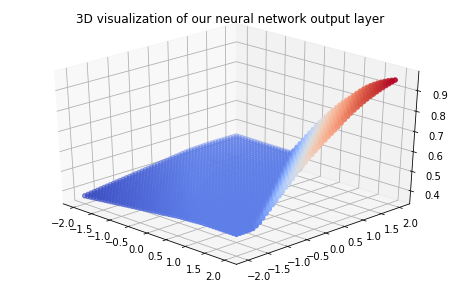

In [245]:
fig = plt.figure(figsize=(8, 5))
ax = plt.axes(projection='3d')
bar = ax.scatter3D(result[:, 0],result[:, 1],out21.reshape(-1), c=out21.reshape(-1), cmap=cm.coolwarm);
ax.view_init(30,-45)
ax.set_title('3D visualization of our neural network output layer')

Accuracy: 0.9032258064516129
Precision: 0.9032258064516129
Recall: 1.0
F1 0.9491525423728813


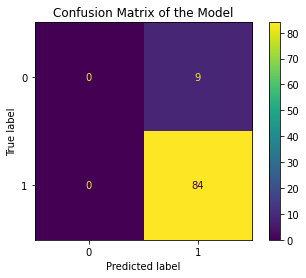

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.90      1.00      0.95        84

    accuracy                           0.90        93
   macro avg       0.45      0.50      0.47        93
weighted avg       0.82      0.90      0.86        93

Accuracy: 0.9032258064516129


In [246]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print("Accuracy:",metrics.accuracy_score(y_test, prediction_values[:, 0].round(0)))
print("Precision:",metrics.precision_score(y_test, prediction_values[:, 0].round(0)))
print("Recall:",metrics.recall_score(y_test, prediction_values[:, 0].round(0)))
print("F1",metrics.f1_score(y_test,prediction_values[:, 0].round(0)))
result = confusion_matrix(y_test, prediction_values[:, 0].round(0))
ConfusionMatrixDisplay.from_predictions(y_test, prediction_values[:, 0].round(0))
plt.title("Confusion Matrix of the Model")
plt.show()
result1 = classification_report(y_test, prediction_values[:, 0].round(0))
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,prediction_values[:, 0].round(0))
print("Accuracy:",result2)